In [1]:
import pandas as pd
import numpy as np


ef = pd.ExcelFile('../NP_transects/transect_densities.xlsx')

sns  = ef.sheet_names

dfs = []

for sn in sns:
    
    df = pd.read_excel('../NP_transects/transect_densities.xlsx',sheet_name=sn)
    
    dfs.append(df)

In [5]:
import datetime

mean_densities = []

for df in dfs:
    
#     print(df)
    
    for col in df.columns[1:]:

        mean_densities.append( {'doy':col.timetuple().tm_yday,
                                    'den': np.nanmean(df[col])*1000,
                                    }
                                )

#     break

/tmp/ipykernel_11663/3219612881.py:12: RuntimeWarning: Mean of empty slice
  'den': np.nanmean(df[col])*1000,


[]

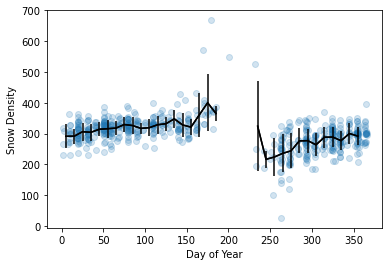

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

            
df = pd.DataFrame(mean_densities)

df.dropna(inplace=True)
    
bins = np.arange(0,361,10)

bcs = np.arange(5,361,10)
            
means, bin_edges, bn = binned_statistic(df['doy'],
                                            df['den'],
                                            bins=bins,
                                            statistic='mean')
       
stds, bin_edges, bn = binned_statistic(df['doy'],
                                            df['den'],
                                            bins=bins,
                                            statistic='std')

            
    
plt.scatter(df['doy'], df['den'],alpha=0.2)

plt.plot(bcs,means,color='k')
plt.errorbar(x=bcs,y=means,yerr=stds,color='k')

plt.ylabel('Snow Density')
plt.xlabel('Day of Year')

plt.plot()